In [5]:
import numpy as np
np.random.seed(1)
a=np.dot(np.random.random(size=(2,2)),np.random.normal(size=(2,4))).T
b=np.arange(3*4*5).reshape(3,4,5)
print(a)
print(b)

[[ 1.03657141  0.52745302]
 [-0.9957675  -0.23026036]
 [ 0.5907057   0.09655489]
 [-1.13941987 -0.07565603]]
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [45 46 47 48 49]
  [50 51 52 53 54]
  [55 56 57 58 59]]]


In [6]:
from __future__ import print_function,division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set()

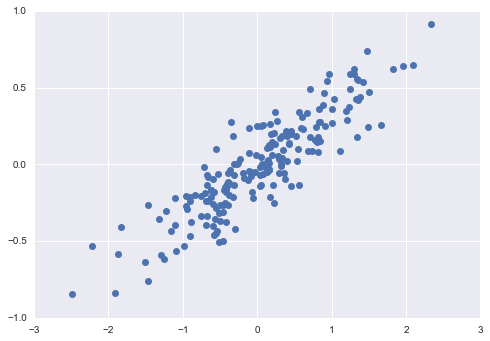

In [7]:
np.random.seed(1)

X=np.dot(np.random.random(size=(2,2)),np.random.normal(size=(2,200))).T

plt.plot(X[:,0],X[:,1],'o')

#plt.axis('equal');


In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)



[ 0.75871884  0.01838551]
[[ 0.94446029  0.32862557]
 [ 0.32862557 -0.94446029]]


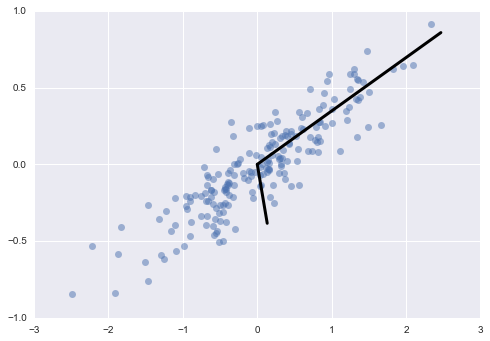

In [9]:
plt.plot(X[:,0],X[:,1],'o',alpha=0.5)

for length,vector in zip(pca.explained_variance_, pca.components_):
    v=vector*3*np.sqrt(length)
    plt.plot([0,v[0]],[0,v[1]],'-k',lw=3)
    
#plt.axis=('equal');    

In [10]:
clf=PCA(0.95)
X_trans=clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


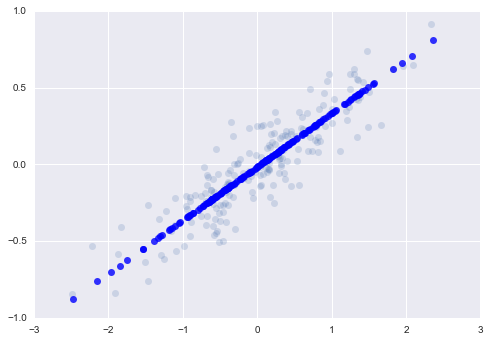

In [11]:
X_new=clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:,0],X_new[:, 1],'ob', alpha=0.8)


In [12]:
from sklearn.datasets import load_digits
digits=load_digits()
X=digits.data
y=digits.target
pca=PCA(2)
Xproj=pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


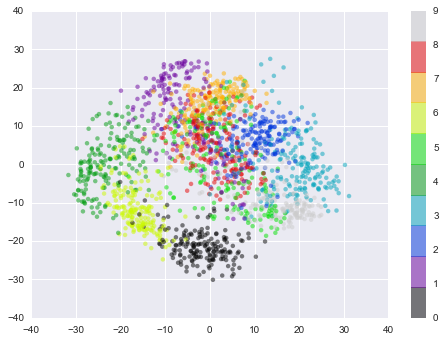

In [13]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none',
           alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar();

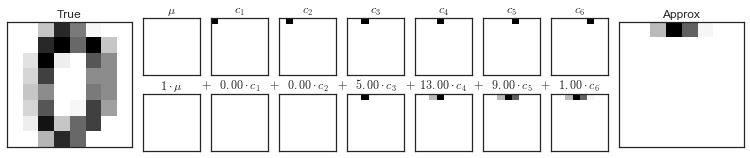

In [15]:
from figures import plot_image_components
sns.set_style('white')
plot_image_components(digits.data[0])

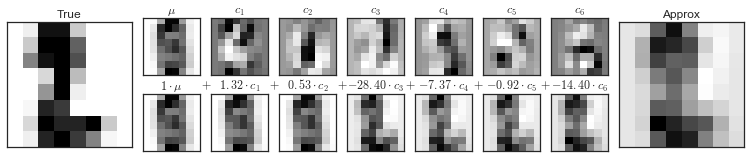

In [16]:
from figures import plot_pca_interactive
plot_pca_interactive(digits.data)

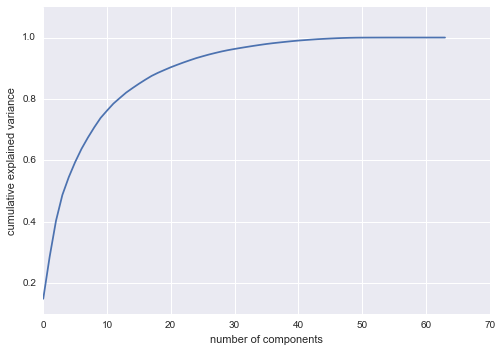

In [17]:
sns.set()
pca=PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


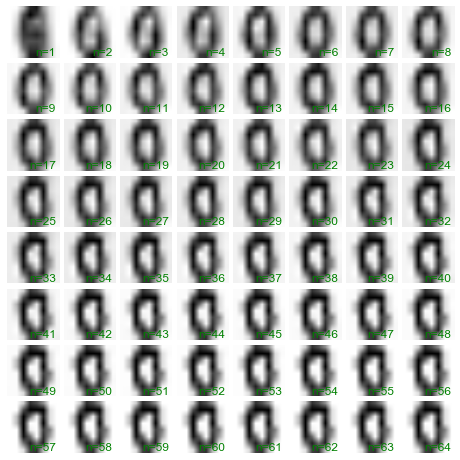

In [18]:
fig,axes=plt.subplots(8,8,figsize=(8,8))
fig.subplots_adjust(hspace=0.1,wspace=0.1)

for i,ax in enumerate(axes.flat):
    pca=PCA(i+1).fit(X)
    im=pca.inverse_transform(pca.transform(X[20:21]))
    
    ax.imshow(im.reshape((8,8)),cmap='binary')
    ax.text(0.95,0.05,'n={0}'.format(i+1),ha='right',
           transform=ax.transAxes,color='green')
    ax.set_xticks([])
    ax.set_yticks([])

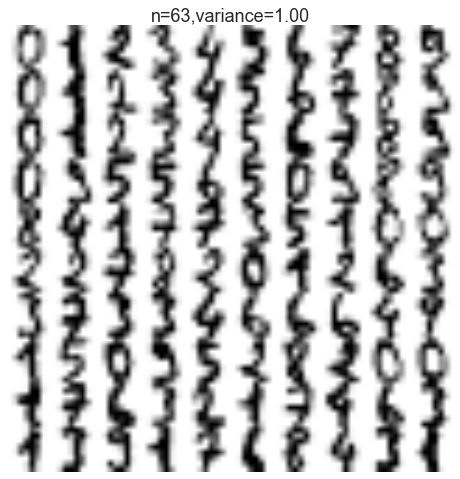

In [19]:
from IPython.html.widgets import interact

def plot_digits(n_components):
    fig=plt.figure(figsize=(8,8))
    plt.subplot(1,1,1,frameon=False,xticks=[],yticks=[])
    nside=10
    
    pca=PCA(n_components).fit(X)
    Xproj=pca.inverse_transform(pca.transform(X[:nside**2]))
    Xproj=np.reshape(Xproj,(nside,nside,8,8))

    total_var=pca.explained_variance_ratio_.sum()
    im=np.vstack([np.hstack([Xproj[i,j] for j in range(nside)])
                 for i in range(nside)])

    plt.imshow(im)
    plt.grid(False)
    plt.title("n={0},variance={1:.2f}".format(n_components,total_var),
             size=18)
    plt.clim(0,16)
    
interact(plot_digits,n_components=[1,64],nside=[1,8]);

    
    
    